###### What is spark? and what is its used
 - It is distributed computing engine.
 - Used to process and analyze large dataset.Just like Hadoop Mapreduce
 - It also works with system distribute data across the culster and process the data in parallel.

##### Difference between Hadoop and Spark?
 - Spark can do it in-memory
 - hadoop Mapreduce has to read from and write to a disk 
 - as a result spark become 100 time faster

##### What is pyspark? and what is it used 
 - It is a python API for Spark.
 - Pyspark , help you interface with Resilient Distributed Datasets (RDDs) in Apache Spark and Python programming language

##### What is SparkConf?
 - It offers configuration of any spark application
 - set(key,value): used to set a configuration property
 - setMaster(value) : Used to set an master URL
 - setAppName(value) : Used to set an aplication name.
 - get(Key,defaultValue = None) : used to get a configuration value of key.
 - setSparkHome(value) : used to set the Spark Installation path

##### PySparkContext?
SparkContext is the entry gate of any Spark-derived application or functionality. It is the first and formst this that get
intiated when you run any spark application . In Pyspark , SparkContext is available as sc by default aso creating a new SparkContext will throw an error.
###### Parameter
- Master : The URL of cluster SparkContext Connects to
- AppName : The name of any job
- SparkHome :A Spark installation directory
- Pyfile: The .zip or .py file send to cluster and then added to pythonpath
- Environment: Worker Node environment Variable
- Batched Size: The number of python Object represented however to disable batching ,set the values to 1; to automatically choose the batch size based on the object size set it to 0; and to use an unlimited batch size set it to -1.
- Serilizer : This parameter tell about an RDD serializer
- Conf : An Object of L{SparkConf} to set all spark Properties
- Profiler_cls : A class of custom profilers used to do profiling however pyspark.profiler.BasicProfiler is the default

###### What is SparkFiles and Class Methods?
 - Sparkfile is used when we need to upload your files in Apache Spark using SparkContext.addfile()
 - Note: Here, to perform class methods in SparkFiles, a file named ‘path’ is created, and the dataset is uploaded on it using os.path.join(“path”,”filename”).
##### Class Methods: How to Use Them?
 - two type of class method
 - get(filename): This class method is used when you need to specify the path of the file that you added using SparkContect.addfile() or sc.addfile()
- from pyspark import SparkFiles
- from pyspark import SparkContext
- path = os.path.join("/Users/intellipaat/Downloads/spark-2.3.2-bin-hadoop2.7", "Fortune5002017.csv")
- sc.addFile(path)
- SparkFiles.get(path)
 - getRootDirectory(): It is used to specify the path to the root directory where the file that you added using SparkContext.addFile() or sc.addFile(), exists. 
- from pyspark import SparkFiles
- from pyspark import SparkContext
- path = os.path.join("/Users/intellipaat/Downloads/spark-2.3.2-bin-hadoop2.7", "Fortune5002017.csv")
- sc.addFile(path)
- SparkFiles.getRootDirectory()



###### RDD Resilient Distributed Dataset
- immutable,Distributed,Partitioned
- its is like arrary , set of element that are divided across multiple nodes in acluster to run parallel processing.
- RDD can automatically recover from failure
 - RDDName = sc.textFile(“ path of the file to be uploaded”)
- operation:
 - take(n)
 - count()
 - top(n)

##### What are Transformation Operation?
- Map
- filter
- reduceByKey()
- groupByKey()
- union()
- intersection()
###### Action operation?
- Count()
- Collect()
- Reduce()
- Take()
- foreach()
- First()


##### What is MLlib?
- Its Machine Learning API 
- Algorithm in pySpark MLlib
  -mllib.classification
  -mllib.clustering
  -mllib.linalg
  -mllib.recommendation
  -spark.mllib

### Perform Linear Regression on Real-world Dataset

In [1]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext("local","Machine learning") # To run Spark Application a driver program starts, which has the main function  and your SparkContext gets intiated here.
sqlContext = pyspark.SQLContext(sc) #SQLContext is used to create dataframe,register Dataframe as table
company_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('D:\STUDY\pyspark\Pyspark study\Dataset\Fortune 500 Companies US.csv')
company_df.take(1)  # load first row

[Row(Rank=1, Company Name='Walmart', Number of Employees='23,00,000', Previous Rank=1, Revenues='$4,85,873', Revenue Change='0.8%', Profits='$13,643.0', Profit Change='-7.2%', Assets='$1,98,825', Market Value='$2,18,619')]

##### EDA on dataframe

In [2]:
company_df.cache()

DataFrame[Rank: int, Company Name: string, Number of Employees: string, Previous Rank: int, Revenues: string, Revenue Change: string, Profits: string, Profit Change: string, Assets: string, Market Value: string]

#### What is cache() and what it is used for ? *
- Dataset.cache() save it to storage level "memory_and_disk"
- RDD.cache() save it to storage level "memory_only"
- Dataset.presist save it to storage levels "Memory_Only,Memory_and_disk,MEMORY_ONLY_SER, MEMORY_AND_DISK_SER, DISK_ONLY, MEMORY_ONLY_2,MEMORY_AND_DISK_2 and more"
- Cache() method in dataset class internally calls persist() method which in turn uses sparkSession.sharedState.cacheManager.cacheQuery

- Note that Dataset cache() is an alias for persist(StorageLevel.MEMORY_AND_DISK)

In [3]:
company_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Number of Employees: string (nullable = true)
 |-- Previous Rank: integer (nullable = true)
 |-- Revenues: string (nullable = true)
 |-- Revenue Change: string (nullable = true)
 |-- Profits: string (nullable = true)
 |-- Profit Change: string (nullable = true)
 |-- Assets: string (nullable = true)
 |-- Market Value: string (nullable = true)



In [4]:
# Dataset have $ dollar symbol with price and () as well and some of the values are there with precentage symbol %
# we need to remove the $ symbol and % symble and convert the datatype to int of float

In [5]:
# To remove the $ dollar symbol here i m using map function 
import pyspark.sql.functions as f

#company_df.select("Number of Employees",f.regexp_replace(f.col("Number of Employees"),"[)$,(%]",""))

company_df = company_df.withColumn('Revenues', f.regexp_replace('Revenues', '[)$,(%]', ''))
company_df = company_df.withColumn('Number of Employees', f.regexp_replace('Number of Employees', '[)$,(%]', ''))
company_df = company_df.withColumn('Revenue Change', f.regexp_replace('Revenue Change', '[)$,(%]', ''))
company_df = company_df.withColumn('Profits', f.regexp_replace('Profits', '[)$,(%]', ''))
company_df = company_df.withColumn('Profit Change', f.regexp_replace('Profit Change', '[)$,(%]', ''))
company_df = company_df.withColumn('Assets', f.regexp_replace('Assets', '[)$,(%]', ''))
company_df = company_df.withColumn('Market Value', f.regexp_replace('Market Value', '[)$,(%]', ''))


In [6]:
company_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Number of Employees: string (nullable = true)
 |-- Previous Rank: integer (nullable = true)
 |-- Revenues: string (nullable = true)
 |-- Revenue Change: string (nullable = true)
 |-- Profits: string (nullable = true)
 |-- Profit Change: string (nullable = true)
 |-- Assets: string (nullable = true)
 |-- Market Value: string (nullable = true)



In [7]:
company_df = company_df.withColumn("Number of Employees",company_df["Number of Employees"].cast('integer'))
company_df = company_df.withColumn("Revenues",company_df["Revenues"].cast('float'))
company_df = company_df.withColumn("Revenue Change",company_df["Revenue Change"].cast('float'))
company_df = company_df.withColumn("Profits",company_df["Profits"].cast('float'))
company_df = company_df.withColumn("Profit Change",company_df["Profit Change"].cast('float'))
company_df = company_df.withColumn("Assets",company_df["Assets"].cast('float'))
company_df = company_df.withColumn("Market Value",company_df["Market Value"].cast('float'))

In [8]:
company_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rank,500,250.5,144.4818327679989,1,500
Company Name,500,None,None,3M,salesforce.com
Number of Employees,500,56955.526,123622.28829319982,1326,2300000
Previous Rank,492,257.1117886178862,154.04809767869145,1,761
Revenues,500,24111.748,38337.353336533255,5145.0,485873.0
Revenue Change,494,3.7469635552722917,20.087136340107538,-57.5,197.3
Profits,499,1783.4753509590287,3940.495363355243,-6177.0,45687.0
Profit Change,434,-0.22511515089993103,118.58187469929302,-892.3,962.5
Assets,500,80389.34,270425.7009408743,437.0,3287968.0


In [9]:
### Find the correlation between independent variables
import pandas as pd
numerical_feature = [t[0] for t in company_df.dtypes if t[1] =='int' or t[1] =='double']
sample_data = company_df.select(numerical_feature).sample(False,0.8).toPandas()
sample_data.plot.scatter(x='Rank',y='Previous Rank', c='DarkBlue')

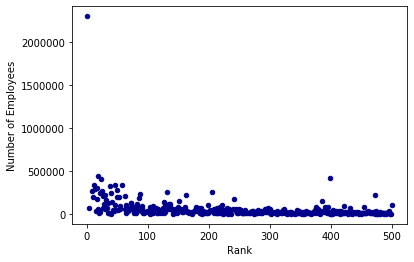

In [10]:
sample_data.plot.scatter(x='Rank',y='Number of Employees', c='DarkBlue')

In [14]:
#Correlation Between Independent Variable
import six
for i in company_df.columns:
    if not( isinstance(company_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Number of Employee for ", i, company_df.stat.corr('Number of Employees',i))

Correlation to Number of Employee for  Rank -0.34535285439684765
Correlation to Number of Employee for  Number of Employees 1.0
Correlation to Number of Employee for  Previous Rank -0.3372052389045615
Correlation to Number of Employee for  Revenues 0.7171111129276473
Correlation to Number of Employee for  Revenue Change 0.02294757490260374
Correlation to Number of Employee for  Profits 0.3405741774792542
Correlation to Number of Employee for  Profit Change 0.011479239544284111
Correlation to Number of Employee for  Assets 0.1254252200249459
Correlation to Number of Employee for  Market Value 0.32317029152830545


##### Preparing Data

In [17]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler  = VectorAssembler(inputCols = ["Rank","Number of Employees"] , outputCol = "features")
tcompany_df = vectorAssembler.transform(company_df)
tcompany_df = tcompany_df.select(['features','Number of Employees'])
tcompany_df.show()

+---------------+-------------------+
|       features|Number of Employees|
+---------------+-------------------+
|[1.0,2300000.0]|            2300000|
| [2.0,367700.0]|             367700|
| [3.0,116000.0]|             116000|
|  [4.0,72700.0]|              72700|
|  [5.0,68000.0]|              68000|
| [6.0,230000.0]|             230000|
| [7.0,204000.0]|             204000|
| [8.0,225000.0]|             225000|
| [9.0,268540.0]|             268540|
|[10.0,201000.0]|             201000|
| [11.0,18500.0]|              18500|
|[12.0,341400.0]|             341400|
|[13.0,295000.0]|             295000|
|[14.0,160900.0]|             160900|
| [15.0,37300.0]|              37300|
|[16.0,172000.0]|             172000|
|[17.0,300000.0]|             300000|
|[18.0,443000.0]|             443000|
| [19.0,55200.0]|              55200|
|  [20.0,7000.0]|               7000|
+---------------+-------------------+
only showing top 20 rows



In [19]:
splits = tcompany_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [20]:
train_df.show()

+---------------+-------------------+
|       features|Number of Employees|
+---------------+-------------------+
| [2.0,367700.0]|             367700|
|  [5.0,68000.0]|              68000|
| [6.0,230000.0]|             230000|
| [7.0,204000.0]|             204000|
| [9.0,268540.0]|             268540|
|[10.0,201000.0]|             201000|
|[12.0,341400.0]|             341400|
|[14.0,160900.0]|             160900|
| [15.0,37300.0]|              37300|
|[16.0,172000.0]|             172000|
|[17.0,300000.0]|             300000|
|[18.0,443000.0]|             443000|
|  [20.0,7000.0]|               7000|
|[21.0,243355.0]|             243355|
|[23.0,406000.0]|             406000|
|[24.0,150540.0]|             150540|
|[28.0,114000.0]|             114000|
| [29.0,53000.0]|              53000|
|[30.0,219000.0]|             219000|
|[31.0,159000.0]|             159000|
+---------------+-------------------+
only showing top 20 rows



##### Linear regression model

In [23]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol ='features',labelCol='Number of Employees',maxIter=10,elasticNetParam = 0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Exception ignored in: <function JavaWrapper.__del__ at 0x0000018A15FD8510>
Traceback (most recent call last):
  File "D:\spark\spark-3.0.1-bin-hadoop2.7\python\pyspark\ml\wrapper.py", line 42, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'LinearRegression' object has no attribute '_java_obj'


Coefficients: [0.0,1.0]
Intercept: 0.0
